In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import mapclassify as mc

In [2]:
def convert_abbrev_to_name(df):
    states = {'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California', 
              'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'DC': 'District Of Columbia', 
              'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 
              'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 
              'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 
              'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 
              'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York', 
              'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon', 
              'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota', 
              'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont', 'VA': 'Virginia', 
              'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'}

    series = df['state'].values

    series = np.array([states[key] for key in series])
    df['statenames'] = series

    return df

In [3]:
fp = '../congress-data/shapefiles/districtShapes110/districts110.shp'
map_df = gpd.read_file(fp)
# check the GeoDataframe
map_df.head()

,STATENAME,ID,DISTRICT,STARTCONG,ENDCONG,DISTRICTSI,COUNTY,PAGE,LAW,NOTE,BESTDEC,FINALNOTE,RNOTE,LASTCHANGE,FROMCOUNTY,geometry
0,Florida,012108112021,21,108,112,None,None,None,None,None,None,"{""From US Census website""}",None,2016-05-29 16:44:10.857626,F,"POLYGON ((-80.30847 25.77738, -80.30967 25.771..."
1,Arkansas,005108112003,3,108,112,None,None,None,None,None,None,"{""From US Census website""}",None,2016-05-29 16:44:10.857626,F,"POLYGON ((-94.43377 35.31490, -94.43367 35.317..."
2,Florida,012108112017,17,108,112,None,None,None,None,None,None,"{""From US Census website""}",None,2016-05-29 16:44:10.857626,F,"POLYGON ((-80.18457 25.84757, -80.18457 25.846..."
3,Florida,012108112018,18,108,112,None,None,None,None,None,None,"{""From US Census website""}",None,2016-05-29 16:44:10.857626,F,"MULTIPOLYGON (((-80.31227 25.63808, -80.31217 ..."
4,Florida,012108112020,20,108,112,None,None,None,None,None,None,"{""From US Census website""}",None,2016-05-29 16:44:10.857626,F,"MULTIPOLYGON (((-80.21477 26.04647, -80.21497 ..."


In [4]:
house_110 = pd.read_csv('../congress-data/house/house_110.csv', index_col=0)
house_110['PCT'] = house_110['missed_votes'] / house_110['total_votes']
house_110 = convert_abbrev_to_name(house_110)

In [5]:
house_110.head()

,id,first_name,last_name,dob,gender,party,leadership_role,govtrack_id,cspan_id,seniority,total_votes,missed_votes,total_present,state,district,at_large,geoid,PCT,statenames
0,A000014,Neil,Abercrombie,1938-06-26,M,D,False,400001,NaN,20,1873,117,4,HI,1,False,1501,0.062467,Hawaii
1,A000022,Gary,Ackerman,1942-11-19,M,D,False,400003,1002061.0,26,1873,95,0,NY,5,False,3605,0.050721,New York
2,A000055,Robert,Aderholt,1965-07-22,M,R,False,400004,45516.0,12,1873,51,4,AL,4,False,104,0.027229,Alabama
3,A000358,Todd,Akin,1947-07-05,M,R,False,400005,87412.0,8,1873,36,5,MO,2,False,2902,0.019221,Missouri
4,A000361,Rodney,Alexander,1946-12-05,M,R,False,400006,1004256.0,6,1873,103,2,LA,5,False,2205,0.054992,Louisiana


In [6]:
# join the geodataframe with the csv dataframe
merged = map_df.merge(house_110, how='inner', left_on=['STATENAME', 'DISTRICT'], right_on=['statenames', 'district'])
merged = merged[['geometry', 'party', 'PCT', 'STATENAME', \
                'DISTRICT']]
merged.head()

,geometry,party,PCT,STATENAME,DISTRICT
0,"POLYGON ((-80.30847 25.77738, -80.30967 25.771...",R,0.036305,Florida,21
1,"POLYGON ((-94.43377 35.31490, -94.43367 35.317...",R,0.010678,Arkansas,3
2,"POLYGON ((-80.18457 25.84757, -80.18457 25.846...",D,0.047517,Florida,17
3,"MULTIPOLYGON (((-80.31227 25.63808, -80.31217 ...",R,0.033636,Florida,18
4,"MULTIPOLYGON (((-80.21477 26.04647, -80.21497 ...",D,0.031500,Florida,20


In [13]:
def plot_by_state(statename, map_df, congress_data):
    fig, ax = plt.subplots(figsize=(10, 6))

    merged = map_df.merge(congress_data, how='inner', left_on=['STATENAME', 'DISTRICT'], right_on=['statenames', 'district'])
    merged = merged[['geometry', 'party', 'PCT', 'STATENAME', 'DISTRICT']]    
    state = merged[merged['STATENAME'] == statename]

    rs = state[state['party'] == 'R']
    ds = state[state['party'] == 'D']
    # set the value column that will be visualised
    variable = 'PCT'
    # create map
    ax1 = rs.plot(column=variable, ax=ax, legend=False, cmap='Reds', scheme='UserDefined', 
                  classification_kwds={'bins': [0.03, 0.06, 0.09, 0.15, 0.3, 1]},
                  missing_kwds={'color': 'lightgrey',
                                 'edgecolor': 'black',
                                 "hatch": "////",
                                 "label": "Missing data"})
    ax2 = ds.plot(column=variable, ax=ax, legend=True, cmap='Blues', scheme='UserDefined',
                  classification_kwds={'bins': [0.03, 0.06, 0.09, 0.15, 0.3, 1]},)

In [14]:
plot_by_state('California', map_df, house_110)

/Users/raficg/opt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:376: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


ValueError: cannot convert float NaN to integer

ValueError: cannot convert float NaN to integer

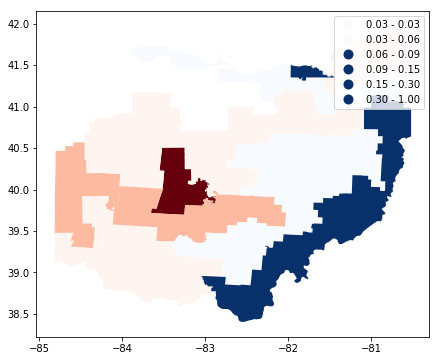

In [105]:
plot_by_state('Ohio', map_df, house_110)